# [Wine Reviews - Kaggle](https://www.kaggle.com/zynicide/wine-reviews)

## **데이터셋 소개** :
Somm(소믈리에와 관련된 다큐멘터리)을 보고 난 후 소믈리에처럼 블라인드테스트를 통해 와인을 식별할 수 있는 예측모델을 만들 수 있는지 궁금해졌어요. 우선 모델을 학습시키기 위해 데이터를 모았습니다. 다양한 리뷰를 분석하기 위해 딥러닝을 사용할 계획이에요. 이 모델은 여전히 와인 맛을 볼수는 없지만 이론적으로는 소믈리에가 주는 묘사를 토대로 와인을 식별할 수 있을거예요. 



이 데이터셋은 감정분석과 텍스트 예측 모델을 위한 훌륭한 기회를 제공할거예요. 와인에 대한 묘사를 바탕으로 와인의 다양성, 와이너리의 위치를 식별할 수 있는 모델을 만들어보세요.

## plotnine

plotnine은 그래픽 문법(grammar of graphics)을 구현하는 데이터 시각화 라이브러리입니다. 그래픽 문법은 데이터 시각화 API 디자인에 대한 접근 방식으로, 지금까지의 그래픽 라이브러리와는 확연하게 다릅니다.

* 1) 우선 figure를 그립니다.
* 2) figure를 조정하고
* 3) 좀 더 심미적으로 만듭니다.

그래픽 문법은 어려운 문제를 해결해요. 그래픽기반 라이브러리의 문법에서 모든 연산은 함수 사용과 같은 방식으로 표현해요. 플롯나인에서는 "adding up"을 통해 그래프를 그릴거예요.

<img src='https://i.imgur.com/UoIbtqI.png'>

In [2]:
import pandas as pd
reviews = pd.read_csv("data/winemag-data-130k-v2.csv", index_col=0)
reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [9]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In [10]:
reviews.shape

(129971, 13)

In [6]:
from plotnine import *

In [21]:
# 와인을 만드는 데 사용되는 포도의 종류 (예, Pinot Noir)
wine_variety = reviews['variety'].value_counts().head(5)
wine_variety

Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
Name: variety, dtype: int64

In [23]:
top_wines = reviews[reviews['variety'].isin(wine_variety.index)]
top_wines.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
12,US,"Slightly reduced, this wine offers a chalky, t...",NaN,87,34.0,California,Alexander Valley,Sonoma,Virginie Boone,@vboone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini
14,US,Building on 150 years and six generations of w...,NaN,87,12.0,California,Central Coast,Central Coast,Matt Kettmann,@mattkettmann,Mirassou 2012 Chardonnay (Central Coast),Chardonnay,Mirassou
20,US,Ripe aromas of dark berries mingle with ample ...,Vin de Maison,87,23.0,Virginia,Virginia,NaN,Alexander Peartree,NaN,Quiévremont 2012 Vin de Maison Red (Virginia),Red Blend,Quiévremont


### The grammar of graphics

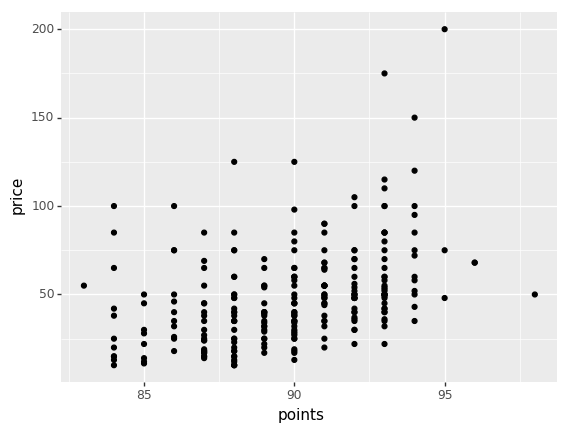

<ggplot: (-9223372036558905393)>

In [11]:
# 점수별 와인가격
df = top_wines.head(1000).dropna()

(ggplot(df)
 + aes('points', 'price')
 + geom_point())

/Users/corazzon/codes/jupyter/lib/python3.6/site-packages/plotnine/stats/smoothers.py:150: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"


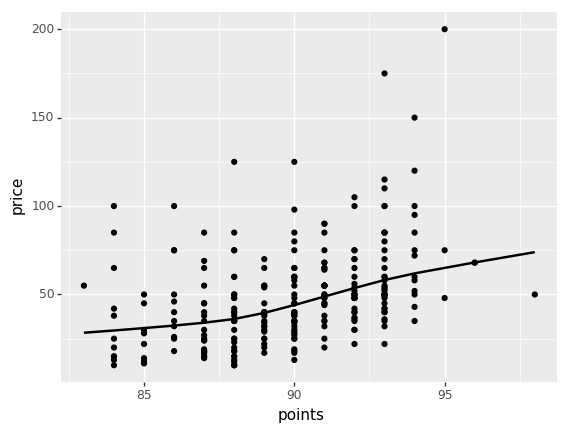

<ggplot: (-9223372036582472188)>

In [24]:
df = top_wines.head(1000).dropna()

(
    ggplot(df)
        + aes('points', 'price')
        + geom_point()
        + stat_smooth()
)

/Users/corazzon/codes/jupyter/lib/python3.6/site-packages/plotnine/stats/smoothers.py:150: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"


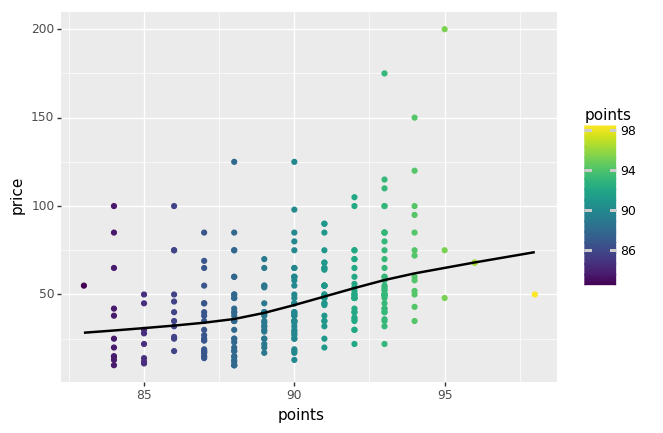

<ggplot: (-9223372036582435917)>

In [25]:
df = top_wines.head(1000).dropna()

(
    ggplot(df)
        + geom_point()
        + aes(color='points')
        + aes('points', 'price')
        + stat_smooth()
)

/Users/corazzon/codes/jupyter/lib/python3.6/site-packages/plotnine/stats/smoothers.py:150: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"


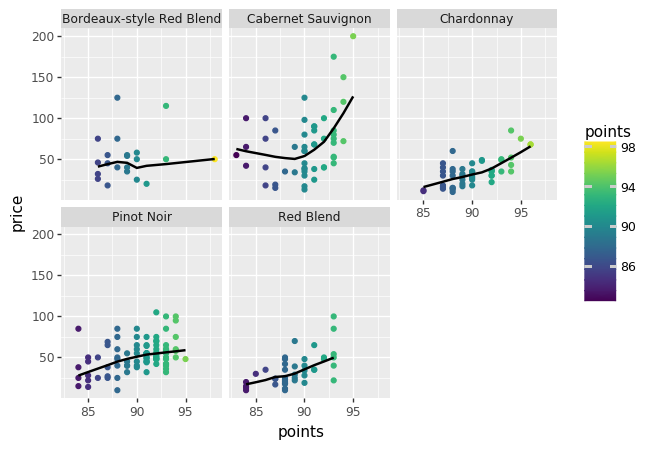

<ggplot: (-9223372036569281753)>

In [26]:
df = top_wines.head(1000).dropna()

(ggplot(df)
     + aes('points', 'price')
     + aes(color='points')
     + geom_point()
     + stat_smooth()
     + facet_wrap('~variety')
)